In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df['target'] = iris.target
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [12]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

In [15]:
X = df.drop(['target'],axis = 'columns')
y = df.target


In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [17]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
y_pred = model.predict(X_test)
y_pred

array([2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 0, 2, 0, 0, 2, 1, 1])

In [23]:
model.score(X_test,y_test) 

0.9666666666666667

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
cm


array([[12,  0,  0],
       [ 0,  8,  1],
       [ 0,  0,  9]])

<Axes: >

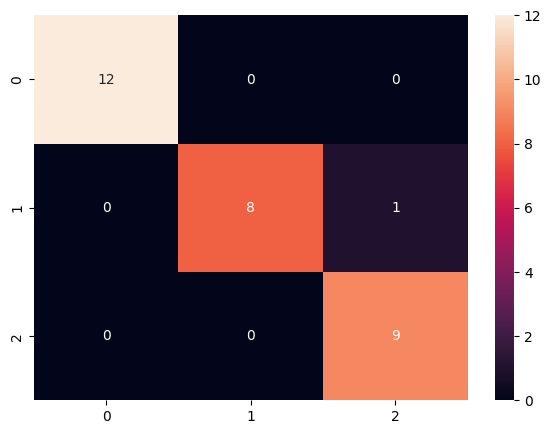

In [29]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)